# BoomBikes demand prediction model




## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 130, 'display.max_columns', 130) 
# Was not abe to list all columns so have set the columns and rows
df = pd.read_csv("data/day.csv")  #Reading the file as unicode
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#shape of the dataframe
df.shape

(730, 16)

In [4]:
#Number of Rows and Columns and information of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# To find the general sense of data
df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking null values percentages
(df.isnull().sum()/df.shape[0])*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
#Getting insights of Unique values
df.apply(lambda x:len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<AxesSubplot:>

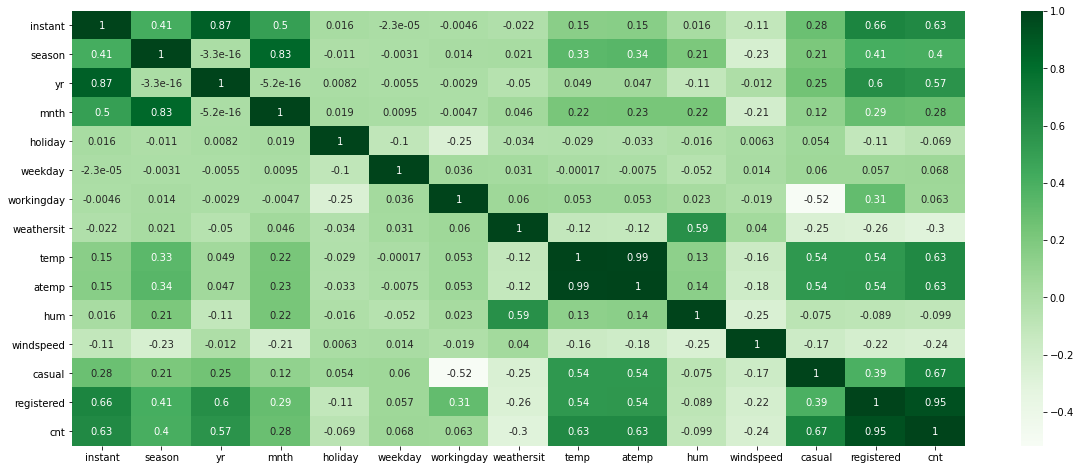

In [8]:
df_corr1=df.corr()
plt.figure(figsize=[20,8])
sns.heatmap(df_corr1,cmap="Greens",annot=True)

Data Cleaning & Formatting


Removing instant, dteday, casual and registered

In [9]:
#Dropping calumns 

df.drop(["instant","dteday","casual","registered"], axis=1,inplace=True)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
#Replicating to df1 for further use
df1 = df

#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
def func_season(x):
    if x==1:
        return 'Spring'
    elif x==2:
        return 'Summer'
    elif x==3:
        return 'Fall'
    else:
        return 'Winter'

#df1['season']=df1['season'].apply(func_season) 

In [13]:
#Getting Value Counts of season
df1["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
#Getting Value Counts of Year
df1["yr"].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [15]:
#defining func and mapping corresponding values
def func_mnth(x):
    if x==1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'Apr'
    elif x==5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==7:
        return 'Jul'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sep'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    else:
        return 'Dec'

df1['mnth']=df1['mnth'].apply(func_mnth) 

In [16]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# defining function and mapping day to value
def func_day(x):
    if x==1:
        return 'Mon'
    elif x==2:
        return 'Tue'
    elif x==3:
        return 'Wed'
    elif x==4:
        return 'Thu'
    elif x==5:
        return 'Fri'
    elif x==6:
        return 'Sat'
    else:
        return 'Sun'

df1['weekday']=df1['weekday'].apply(func_day)

In [18]:
df1.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
# defining function and mapping weather to value
def func_wthr(x):
    if x==1:
        return 'Clear'
    elif x==2:
        return 'Misty'
    elif x==3:
        return 'Cold'
    else:
        return 'Bad_Weather'

df1['weathersit']=df1['weathersit'].apply(func_wthr)

In [20]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Renaming & capitalizing the Columns names

df1.rename(columns={"yr":"Year","mnth":"Month","weathersit":"Weather","temp":"Temperature","hum":"Humidity","cnt":"Count"},
           inplace=True)
df1.columns = df1.columns.str.strip().str.capitalize()

In [22]:
df1.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemp,Humidity,Windspeed,Count
0,1,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Making Categorical & Numerical columns

In [23]:
#Defining Category Columns
cat_columns = ["Season","Year","Month","Holiday","Weekday","Weather","Workingday"]
for cols in cat_columns:
    df1[cols] = df1[cols].astype("category")

In [24]:
#Defining numerical Columns
num_columns = ["Temperature","Weather","Humidity","Windspeed","Count"]

In [25]:
df1.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemp,Humidity,Windspeed,Count
0,1,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Univariate Analysis

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

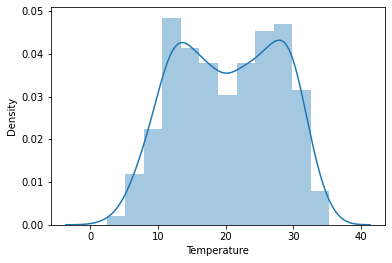

In [26]:
#Viewing Tempreture distibution
sns.distplot(df1["Temperature"])

<AxesSubplot:xlabel='Humidity', ylabel='Density'>

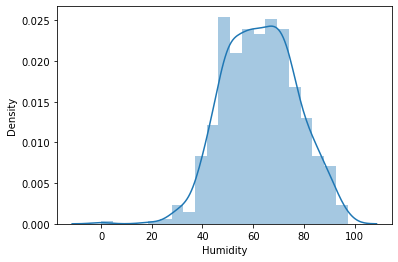

In [27]:
#Viewing Humidity distibution
sns.distplot(df1["Humidity"])

<AxesSubplot:xlabel='Windspeed', ylabel='Density'>

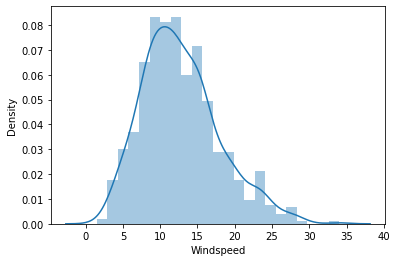

In [28]:
#Viewing Windspeed distibution
sns.distplot(df1["Windspeed"])

<AxesSubplot:xlabel='Count', ylabel='Density'>

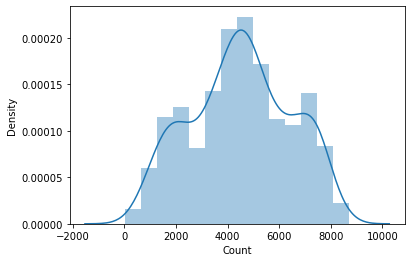

In [29]:
#Viewing Count distibution
sns.distplot(df1["Count"])

MultiVariate Analysis

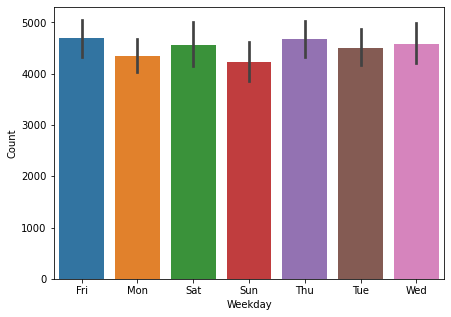

In [30]:
#Plotting Weekday vs Count
plt.figure(figsize=[7,5])
sns.barplot(data=df1, x="Weekday", y=df1["Count"])
plt.show()

- We can see that Sunday has the lowest count 

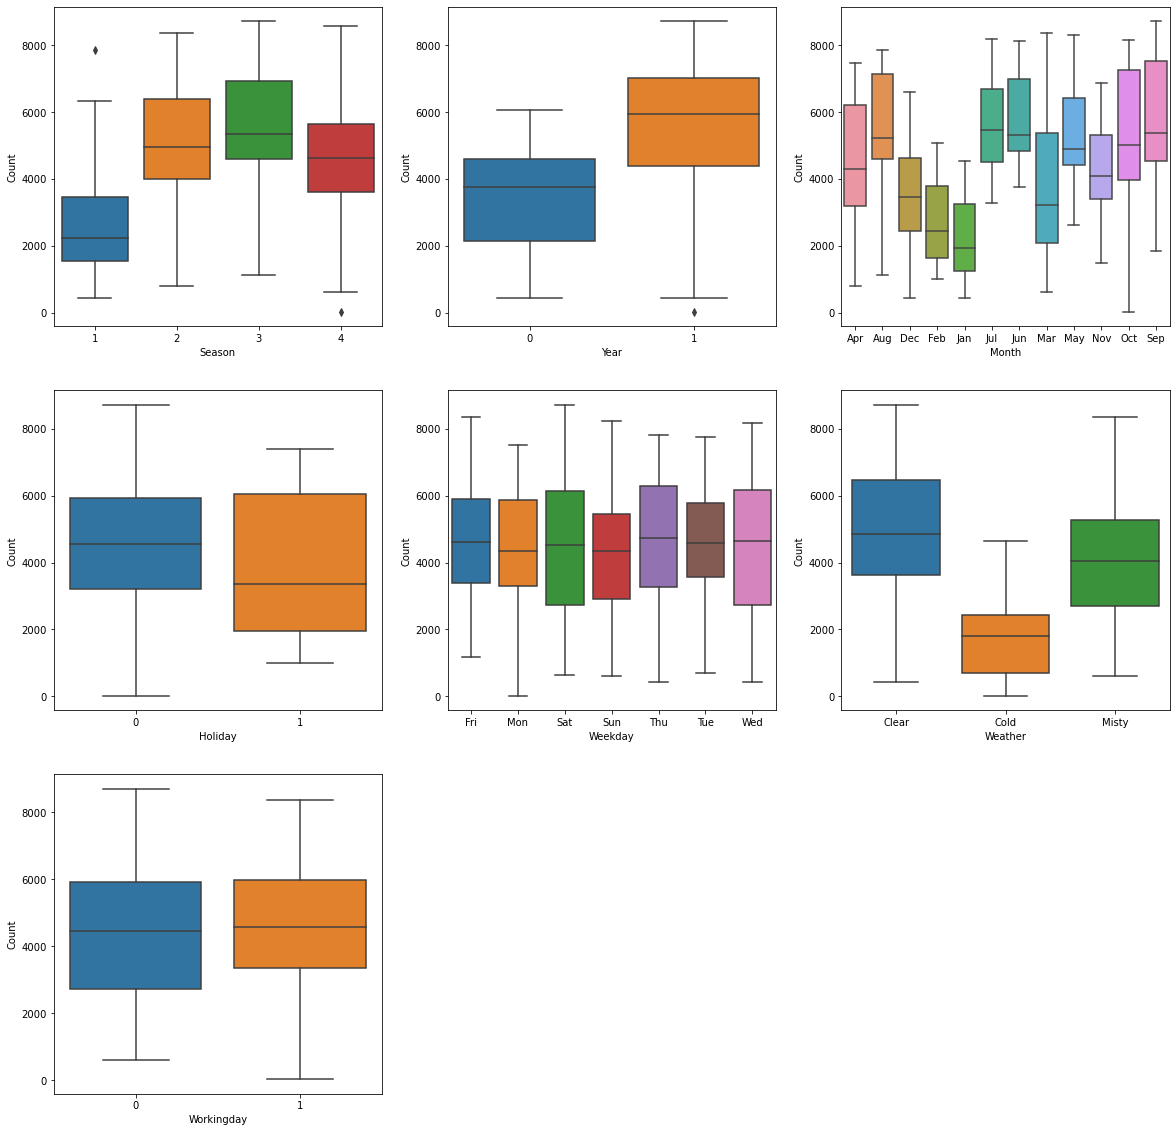

In [31]:
##### Visualizing Category Variables
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='Season', y='Count',data=df)
plt.subplot(332)
sns.boxplot(x='Year', y='Count',data=df)
plt.subplot(333)
sns.boxplot(x='Month', y='Count',data=df)
plt.subplot(334)
sns.boxplot(x='Holiday', y='Count',data=df)
plt.subplot(335)
sns.boxplot(x='Weekday', y='Count',data=df)
plt.subplot(336)
sns.boxplot(x='Weather', y='Count',data=df)
plt.subplot(337)
sns.boxplot(x='Workingday', y='Count',data=df)
plt.show();

## Inferences
- 1. We can see that Fall Season has highest Counts
- 2. In Year 2019, bike riding increased significantly.
- 3. Rider dont prefer - Cold months like Dec, Jan, Feb. They most prefer Jun, Jul, Aug, Sept, Oct
- 4. Sunday have low counts.
- 5. Cold weather has least counts.

<Figure size 1440x1440 with 0 Axes>

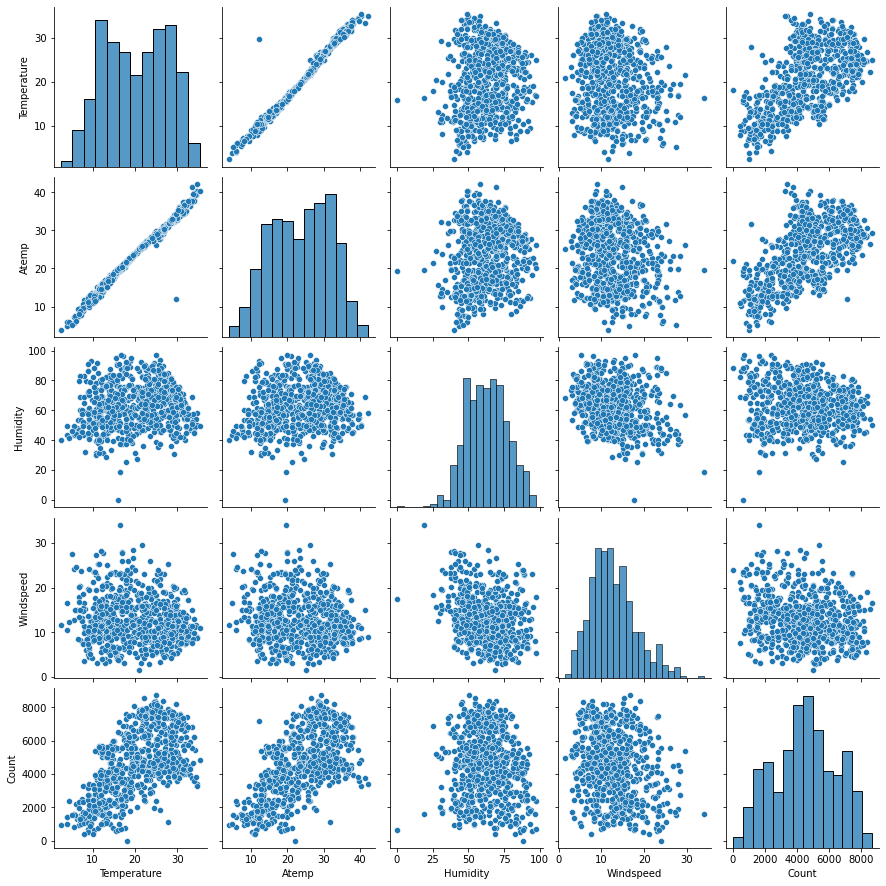

In [32]:
#Getting view of Numerical data
plt.figure(figsize=(20,20))
sns.pairplot(df1)
plt.show()

## Defining Dummy variables

In [33]:
df1['Chill_Index'] = (10 * df1['Windspeed']** 0.5 - df1['Windspeed'] + 10.5) * (33 - df1['Atemp'])

In [34]:
df1.head(3)

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemp,Humidity,Windspeed,Count,Chill_Index
0,1,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,482.159605
1,1,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,530.672027
2,1,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,815.339054


In [35]:
df2 = pd.get_dummies(data = df1, columns = ['Weather','Weekday','Month'], drop_first=False)
print(df2)

    Season Year Holiday Workingday  Temperature     Atemp  Humidity  \
0        1    0       0          0    14.110847  18.18125   80.5833   
1        1    0       0          0    14.902598  17.68695   69.6087   
2        1    0       0          1     8.050924   9.47025   43.7273   
3        1    0       0          1     8.200000  10.60610   59.0435   
4        1    0       0          1     9.305237  11.46350   43.6957   
..     ...  ...     ...        ...          ...       ...       ...   
725      1    1       0          1    10.420847  11.33210   65.2917   
726      1    1       0          1    10.386653  12.75230   59.0000   
727      1    1       0          0    10.386653  12.12000   75.2917   
728      1    1       0          0    10.489153  11.58500   48.3333   
729      1    1       0          1     8.849153  11.17435   57.7500   

     Windspeed  Count  Chill_Index  Weather_Clear  Weather_Cold  \
0    10.749882    985   482.159605              0             0   
1    16.65211

In [36]:
df2.head()

,Season,Year,Holiday,Workingday,Temperature,Atemp,Humidity,Windspeed,Count,Chill_Index,Weather_Clear,Weather_Cold,Weather_Misty,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,482.159605,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,530.672027,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,815.339054,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,728.515016,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,718.555889,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
# defining train test with random state = 100
df_train , df_test = train_test_split(df2, train_size=0.7, random_state=100)

In [38]:
# shape of train set
df_train.shape

(510, 32)

In [39]:
#shape of test set
df_test.shape

(220, 32)

In [40]:
#Rescalling
scaler= MinMaxScaler()
num_col=['Temperature','Humidity','Atemp','Windspeed','Chill_Index','Count']
df_train[num_col]=scaler.fit_transform(df_train[num_col])
df_train.head()

,Season,Year,Holiday,Workingday,Temperature,Atemp,Humidity,Windspeed,Count,Chill_Index,Weather_Clear,Weather_Cold,Weather_Misty,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
576,3,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.219541,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.538278,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.819639,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,2,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.570322,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111,2,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.676269,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train= df_train.pop('Count')
X_train=df_train

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Season         730 non-null    category
 1   Year           730 non-null    category
 2   Holiday        730 non-null    category
 3   Workingday     730 non-null    category
 4   Temperature    730 non-null    float64 
 5   Atemp          730 non-null    float64 
 6   Humidity       730 non-null    float64 
 7   Windspeed      730 non-null    float64 
 8   Count          730 non-null    int64   
 9   Chill_Index    730 non-null    float64 
 10  Weather_Clear  730 non-null    uint8   
 11  Weather_Cold   730 non-null    uint8   
 12  Weather_Misty  730 non-null    uint8   
 13  Weekday_Fri    730 non-null    uint8   
 14  Weekday_Mon    730 non-null    uint8   
 15  Weekday_Sat    730 non-null    uint8   
 16  Weekday_Sun    730 non-null    uint8   
 17  Weekday_Thu    730 non-null    uint

In [43]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# LR model
lm = LinearRegression()
lm.fit(X_train, y_train)

#Calling RFE 
rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Season', True, 1),
 ('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', False, 6),
 ('Temperature', True, 1),
 ('Atemp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Chill_Index', True, 1),
 ('Weather_Clear', True, 1),
 ('Weather_Cold', True, 1),
 ('Weather_Misty', False, 2),
 ('Weekday_Fri', False, 15),
 ('Weekday_Mon', False, 13),
 ('Weekday_Sat', False, 5),
 ('Weekday_Sun', False, 12),
 ('Weekday_Thu', False, 16),
 ('Weekday_Tue', False, 14),
 ('Weekday_Wed', False, 17),
 ('Month_Apr', True, 1),
 ('Month_Aug', False, 11),
 ('Month_Dec', False, 8),
 ('Month_Feb', False, 10),
 ('Month_Jan', False, 7),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 3),
 ('Month_Mar', True, 1),
 ('Month_May', True, 1),
 ('Month_Nov', False, 9),
 ('Month_Oct', False, 4),
 ('Month_Sep', True, 1)]

In [46]:
# Extracting the columns from the X_train that are selected through RFE
col = X_train.columns[rfe.support_]

# Creating a new dataset with features selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [47]:
# Importing VIF from Statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for VIF
def func_vif(x):
    vif = pd.DataFrame()
    X = x.drop("const", axis=1)
    vif["features"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values.astype(float), i),2) for i in range(X.shape[1])]
    return vif.sort_values(by = "VIF", ascending=False)

In [48]:
# Add Constant to variable
X_train_1 = sm.add_constant(X_train_rfe)

# Creating model 1
M1 = sm.OLS(y_train, X_train_1.astype(float)).fit()
M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.20e-184
Time:                        23:54:16   Log-Likelihood:                 502.52
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     494   BIC:                            -905.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0380      0.297     -0.128      0.898      -0.621       0.545
Season            0.0548      0.004     12.299      0.000       0.046       0.064
Year              0.2302      0.008     27.867      0.000       0.214       0.246
Holiday          -0.0924      0.026     -3.550      0.000      -0.144      -0.041
Temperature       0.3850      0.135      2.860      0.004       0.120       0.650
Atemp             0.2740      0.369      0.743      0.458      -0.450       0.998
Humidity         -0.1658      0.039     -4.296      0.000      -0.242      -0.090
Windspeed        -0.1925      0.039     -4.881      0.000      -0.270      -0.115
Chill_Index       0.1631      0.309      0.528      0.598      -0.444       0.770
Weather_Clear     0.0541      0.011      5.075      0.000       0.033       0.075
Weather_Cold     -0.1849      0.026     -7.227      0.000      -0.235      -0.135
Month_Apr         0.0655      0.016      4.041      0.000       0.034       0.097
Month_Jul        -0.0811      0.018     -4.554      0.000      -0.116      -0.046
Month_Mar         0.0525      0.015      3.447      0.001       0.023       0.082
Month_May         0.0860      0.016      5.301      0.000       0.054       0.118
Month_Sep         0.0620      0.016      3.841      0.000       0.030       0.094
==============================================================================
Omnibus:                       50.659   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.571
Skew:                          -0.537   Prob(JB):                     4.86e-26
Kurtosis:                       5.081   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# VIF values
func_vif(X_train_1)

,features,VIF
4,Atemp,381.72
3,Temperature,343.06
5,Humidity,38.51
7,Chill_Index,19.32
0,Season,8.90
6,Windspeed,6.48
8,Weather_Clear,4.19
1,Year,2.10
11,Month_Jul,1.46
12,Month_Mar,1.38


In [50]:
# Dropping the Atemp column
X_train_rfe2 =  X_train_rfe.drop("Atemp", axis=1)

# Add constant 
X_train_2 = sm.add_constant(X_train_rfe2)

# Building model 2
M2 = sm.OLS(y_train, X_train_2).fit()
M2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.93e-185
Time:                        23:54:16   Log-Likelihood:                 502.24
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     495   BIC:                            -911.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1652      0.115      1.436      0.152      -0.061       0.391
Season            0.0546      0.004     12.285      0.000       0.046       0.063
Year              0.2302      0.008     27.881      0.000       0.214       0.246
Holiday          -0.0925      0.026     -3.554      0.000      -0.144      -0.041
Temperature       0.4469      0.106      4.223      0.000       0.239       0.655
Humidity         -0.1678      0.038     -4.359      0.000      -0.243      -0.092
Windspeed        -0.1739      0.031     -5.701      0.000      -0.234      -0.114
Chill_Index      -0.0497      0.116     -0.428      0.669      -0.278       0.178
Weather_Clear     0.0535      0.011      5.038      0.000       0.033       0.074
Weather_Cold     -0.1846      0.026     -7.219      0.000      -0.235      -0.134
Month_Apr         0.0659      0.016      4.071      0.000       0.034       0.098
Month_Jul        -0.0803      0.018     -4.520      0.000      -0.115      -0.045
Month_Mar         0.0534      0.015      3.520      0.000       0.024       0.083
Month_May         0.0865      0.016      5.339      0.000       0.055       0.118
Month_Sep         0.0628      0.016      3.908      0.000       0.031       0.094
==============================================================================
Omnibus:                       50.176   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.459
Skew:                          -0.532   Prob(JB):                     8.48e-26
Kurtosis:                       5.074   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# VIF values for model 2
func_vif(X_train_2)

,features,VIF
4,Humidity,34.97
3,Temperature,27.00
6,Chill_Index,18.11
0,Season,8.73
5,Windspeed,6.48
7,Weather_Clear,4.02
1,Year,2.09
10,Month_Jul,1.46
11,Month_Mar,1.36
12,Month_May,1.34


In [52]:
#Model 3 - 

# Dropping Humidity
X_train_rfe3 = X_train_rfe2.drop("Humidity", axis=1)

# Adding constant
X_train_3 = sm.add_constant(X_train_rfe3)

# Building model 3
M3 = sm.OLS(y_train, X_train_3).fit()
M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.54e-182
Time:                        23:54:17   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     496   BIC:                            -898.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0110      0.110     -0.101      0.920      -0.226       0.204
Season            0.0524      0.004     11.658      0.000       0.044       0.061
Year              0.2335      0.008     27.897      0.000       0.217       0.250
Holiday          -0.0945      0.026     -3.567      0.000      -0.147      -0.042
Temperature       0.4839      0.107      4.507      0.000       0.273       0.695
Windspeed        -0.1515      0.031     -4.948      0.000      -0.212      -0.091
Chill_Index       0.0096      0.117      0.082      0.935      -0.221       0.240
Weather_Clear     0.0798      0.009      8.956      0.000       0.062       0.097
Weather_Cold     -0.2056      0.026     -8.046      0.000      -0.256      -0.155
Month_Apr         0.0720      0.016      4.386      0.000       0.040       0.104
Month_Jul        -0.0731      0.018     -4.061      0.000      -0.109      -0.038
Month_Mar         0.0553      0.015      3.584      0.000       0.025       0.086
Month_May         0.0786      0.016      4.795      0.000       0.046       0.111
Month_Sep         0.0594      0.016      3.631      0.000       0.027       0.091
==============================================================================
Omnibus:                       50.020   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.022
Skew:                          -0.540   Prob(JB):                     4.73e-25
Kurtosis:                       5.026   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# VIF Values for model 3
func_vif(X_train_3)

,features,VIF
3,Temperature,10.58
0,Season,8.41
5,Chill_Index,6.24
4,Windspeed,5.74
6,Weather_Clear,2.89
1,Year,2.08
9,Month_Jul,1.45
10,Month_Mar,1.36
11,Month_May,1.31
12,Month_Sep,1.26


In [54]:
# Dropping Temperature
X_train_rfe4 = X_train_rfe3.drop("Temperature", axis=1)

# Creating constant
X_train_4 = sm.add_constant(X_train_rfe4)

# Building model
M4 = sm.OLS(y_train, X_train_4).fit()
M4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.41e-179
Time:                        23:54:17   Log-Likelihood:                 482.40
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     497   BIC:                            -883.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4716      0.024     19.638      0.000       0.424       0.519
Season            0.0507      0.005     11.103      0.000       0.042       0.060
Year              0.2351      0.009     27.594      0.000       0.218       0.252
Holiday          -0.0924      0.027     -3.422      0.001      -0.145      -0.039
Windspeed        -0.0810      0.027     -3.019      0.003      -0.134      -0.028
Chill_Index      -0.5065      0.026    -19.650      0.000      -0.557      -0.456
Weather_Clear     0.0800      0.009      8.807      0.000       0.062       0.098
Weather_Cold     -0.2000      0.026     -7.686      0.000      -0.251      -0.149
Month_Apr         0.0640      0.017      3.846      0.000       0.031       0.097
Month_Jul        -0.0638      0.018     -3.500      0.001      -0.100      -0.028
Month_Mar         0.0526      0.016      3.343      0.001       0.022       0.083
Month_May         0.0773      0.017      4.628      0.000       0.044       0.110
Month_Sep         0.0651      0.017      3.921      0.000       0.033       0.098
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.543
Skew:                          -0.529   Prob(JB):                     2.46e-27
Kurtosis:                       5.156   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# VIF Values for model 4
func_vif(X_train_4)

,features,VIF
4,Chill_Index,5.31
3,Windspeed,5.00
0,Season,4.27
5,Weather_Clear,2.65
1,Year,1.95
9,Month_Mar,1.29
8,Month_Jul,1.28
7,Month_Apr,1.19
11,Month_Sep,1.19
6,Weather_Cold,1.12


In [56]:
# Correlation with count
df2[df2.columns[1:]].corr()['Count'][:].sort_values(ascending = False)

Count            1.000000
Atemp            0.630685
Temperature      0.627044
Weather_Clear    0.251010
Month_Jun        0.195568
Month_Sep        0.194664
Month_Aug        0.182100
Month_Jul        0.166236
Month_May        0.132553
Month_Oct        0.108846
Weekday_Fri      0.038403
Weekday_Thu      0.033551
Weekday_Wed      0.014012
Weekday_Sat      0.009012
Weekday_Tue      0.000560
Month_Apr       -0.003574
Weekday_Mon     -0.035991
Month_Nov       -0.040344
Weekday_Sun     -0.059146
Humidity        -0.098543
Month_Mar       -0.128456
Weather_Misty   -0.170686
Month_Dec       -0.173878
Windspeed       -0.235132
Weather_Cold    -0.240602
Month_Feb       -0.273848
Month_Jan       -0.367167
Chill_Index     -0.635200
Name: Count, dtype: float64

In [57]:
y_test = M4.predict(X_train_4)

In [58]:
M4.params

const            0.471599
Season           0.050663
Year             0.235133
Holiday         -0.092378
Windspeed       -0.080992
Chill_Index     -0.506533
Weather_Clear    0.079966
Weather_Cold    -0.199968
Month_Apr        0.063961
Month_Jul       -0.063809
Month_Mar        0.052570
Month_May        0.077272
Month_Sep        0.065148
dtype: float64

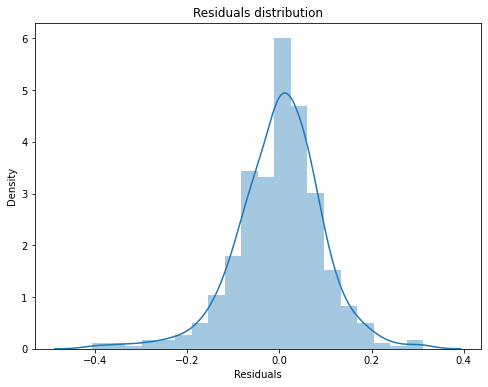

In [59]:
# Lets check whether the model_13 is following the assumption
y_train_pred = M4.predict(X_train_4)
residual = (y_train - y_train_pred)

# Plotting distribution plot for the residuals
plt.figure(figsize=[8,6])
sns.distplot(residual, bins=20)
plt.title("Residuals distribution")
plt.xlabel("Residuals")
plt.show()


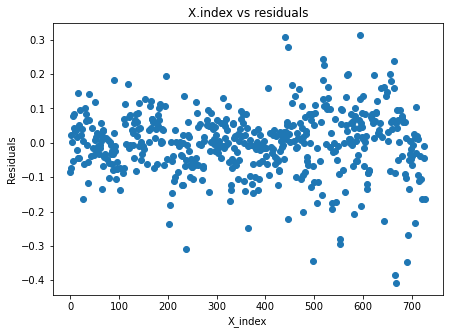

In [60]:
# Checking homoscedasticity
plt.figure(figsize=[7,5])
plt.scatter(X_train.index, residual)
plt.title("X.index vs residuals")
plt.xlabel("X_index")
plt.ylabel("Residuals")
plt.show()



In [61]:
# Extracting the required features
X_test = df_test[X_train_rfe4.columns]

# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [62]:
df_test[num_col] = scaler.transform(df_test[num_col])

In [63]:
y_test = df_test.pop('Count')
X_test = df_test

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = M4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

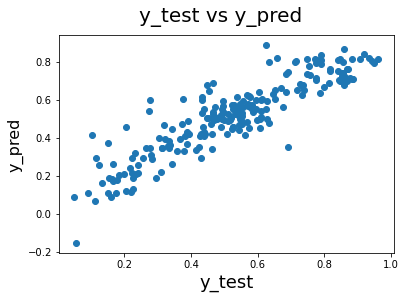

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [67]:
# Train R Squared
train_r2= round(r2_score(y_train, y_train_pred),3)

print("Train R Squared : ", train_r2)

# Train Adjusted R Squared
train_n = X_train_2.shape[0]
train_p = X_train_2.shape[1]
train_adjusted_r2 = round(1-(1-train_r2)*(train_n-1)/(train_n-train_p-1),2)

print("Train Adjusted R Squared : ", train_adjusted_r2)

# Test R Squared
test_r2= round(r2_score(y_test, y_pred),3)

print("Test R Squared : ", test_r2)

# Test Adjusted R Squared
test_n = X_test_new.shape[0]
test_p = X_test_new.shape[1]
test_adjusted_r2 = round(1-(1-test_r2)*(test_n-1)/(test_n-test_p-1),2)

print("Test Adjusted R Squared : ", test_adjusted_r2)


Train R Squared :  0.824
Train Adjusted R Squared :  0.82
Test R Squared :  0.8
Test Adjusted R Squared :  0.79


In [68]:
M4.params

const            0.471599
Season           0.050663
Year             0.235133
Holiday         -0.092378
Windspeed       -0.080992
Chill_Index     -0.506533
Weather_Clear    0.079966
Weather_Cold    -0.199968
Month_Apr        0.063961
Month_Jul       -0.063809
Month_Mar        0.052570
Month_May        0.077272
Month_Sep        0.065148
dtype: float64

## Defining the Equation
Count = 0.471599+(0.050663 * Season)+ (0.050663 * Year)-(Holiday * 0.092378)- (Windspeed x 0.080992) - (Chill_Index * 0.506533) + (Weather_Clear  * 0.079966) -(Weather_Cold * 0.199968) + (season_winter x 0.003251) + (Month_Apr * 0.063961) - (Month_Jul * 0.063809) + (Month_Apr * 0.063961) + (Month_Mar * 0.052570) +(Month_May * 0.077272) + (Month_Sep * 0.065148) 